## Discritization
Discretization transformed the continuous variables into discrete variables by creating a set of continuous intervals that span the range of the variables's values. Discretization is also called Binning where bin is an alternative name of intervals.

## Why use Discretization?
* To handle Outliers
* To improve the value spread

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('images/Titanic.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.shape

(891, 3)

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:]
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y, cv=10, scoring='accuracy'))

0.6331377151799686

## Discretization

In [15]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [16]:
trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [17]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [18]:
trf.named_transformers_['second'].n_bins_

array([10])

In [19]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [20]:
output = pd.DataFrame({
    'Age':X_train['Age'],
    'Age_trf':X_train_trf[:,0],
    'Fare':X_train['Fare'],
    'Fare_trf':X_train_trf[:,1]
})

In [21]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [22]:
output.sample(5)

,Age,Age_trf,Fare,Fare_trf,age_labels,fare_labels
701,35.0,10.0,26.2875,6.0,"(32.0, 35.0]","(26.0, 29.125]"
809,33.0,9.0,53.1000,8.0,"(32.0, 35.0]","(51.479, 82.171]"
463,48.0,13.0,13.0000,4.0,"(47.0, 54.0]","(9.225, 13.0]"
352,15.0,1.0,7.2292,0.0,"(6.0, 16.0]","(0.0, 7.75]"
519,32.0,9.0,7.8958,2.0,"(30.0, 32.0]","(7.75, 7.896]"


In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = clf.predict(X_test_trf)

In [25]:
accuracy_score(y_pred, y_test)

0.6363636363636364

In [26]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6288928012519561

In [53]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Age Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("Age After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Fare Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare After")

    plt.show()

0.6541666666666666


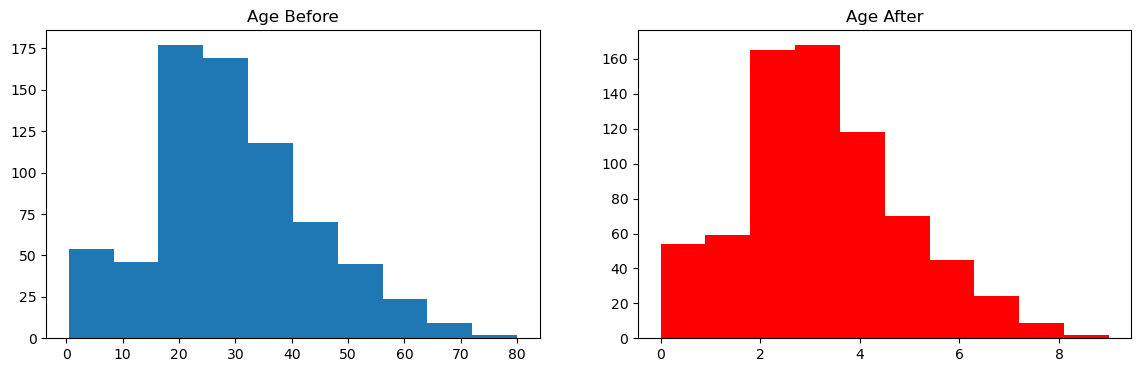

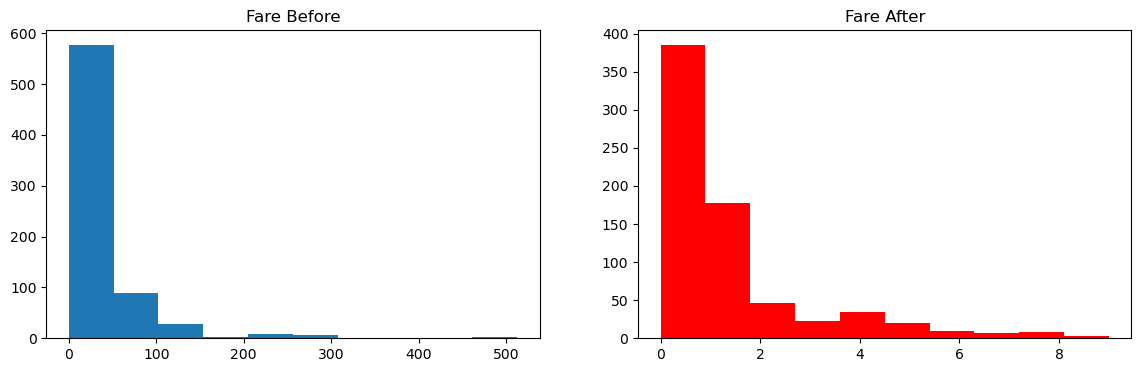

In [54]:
discretize(10,'kmeans')

0.6457550860719875


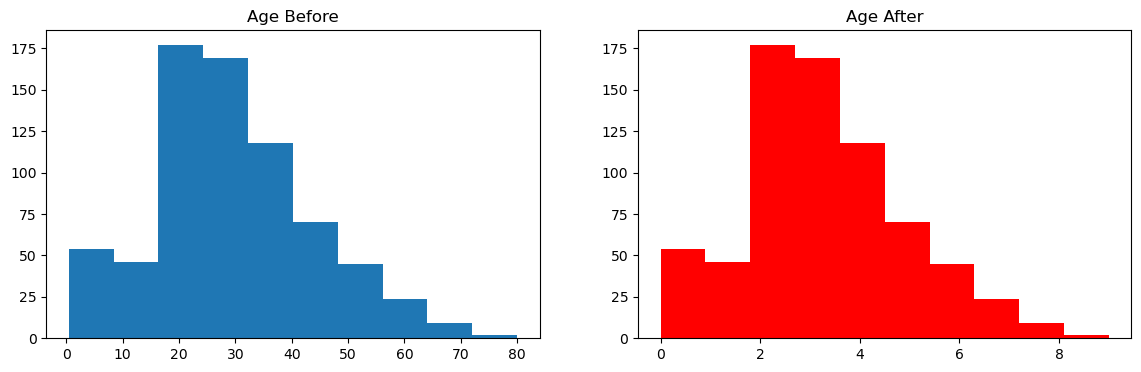

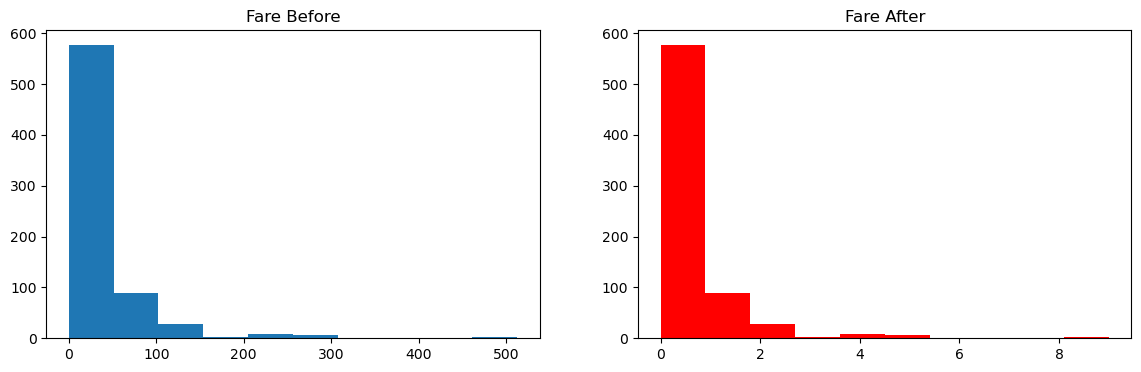

In [55]:
discretize(10,'uniform')

0.655535993740219


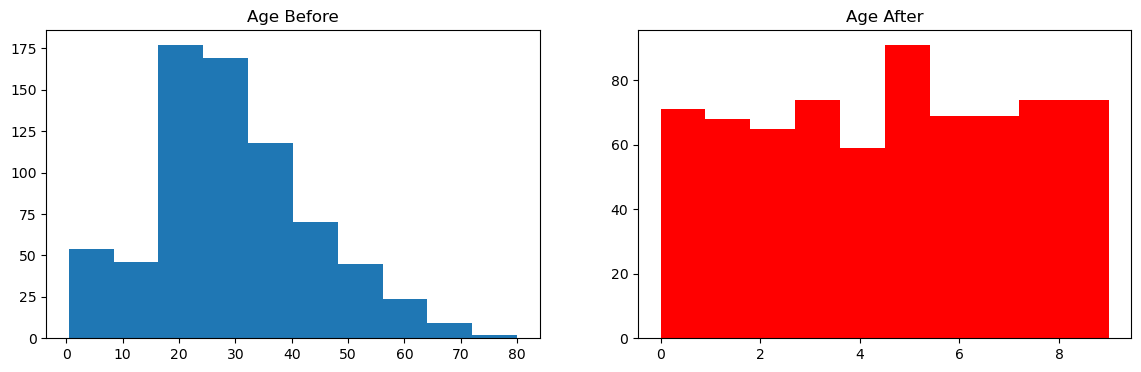

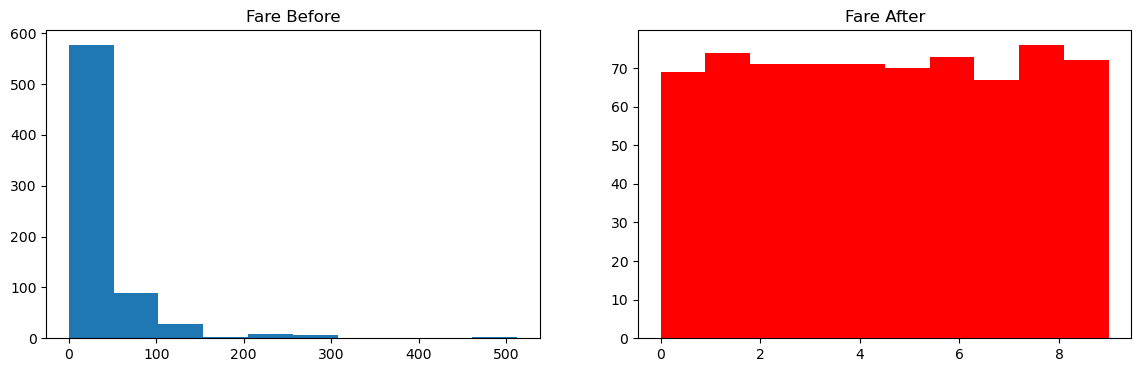

In [56]:
discretize(10,'quantile')

## Binarization
In binarization we convert the continuous value into binary form (0,1). Like YES OR NOT

In [57]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer



In [32]:
df = pd.read_csv('images/Titanic.csv', usecols=['Age','Fare','SibSp','Parch','Survived'])

In [33]:
df.dropna(inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [34]:
df['family'] = df['SibSp'] + df['Parch']

In [35]:
df.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [36]:
df.drop(columns=['SibSp','Parch'],inplace=True)
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [37]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [40]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6223776223776224

In [41]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6513302034428795

In [42]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [43]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [44]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [45]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [46]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6153846153846154

In [47]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6219874804381847

In [48]:
import pandas as pd
(pd.Timestamp('11/29/2019').weekday()) #+ pd.offsets.MonthEnd()).weekday()

4

In [49]:
import pandas as pd
pd.Period('01/12/2019', 'M') + 5

Period('2019-06', 'M')

<!-- -->

In [52]:
stats.skew(df['Fare'])

<IPython.core.display.Javascript object>

4.643848122581354